In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_data = pd.merge(mouse_drug_data, clinical_trial_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
drug_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_df = drug_data.groupby(["Drug","Timepoint"])
avg_tumor_vol_df = drug_timepoint_df["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
avg_tumor_vol_df = pd.DataFrame({"Average Tumor Volume":avg_tumor_vol_df}).reset_index()

# Preview DataFrame
avg_tumor_vol_df.head()

,Drug,Timepoint,Average Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
def menu():
    
    choice = input(">\n")
    
    while choice != 1 or 2 or 3 or 4 or 5 or 6 or 7 or 8 or 9:   
        if choice == "1":
            return "Capomulin"
        elif choice == "2":
             return "Ceftamin"
        elif choice == "3":
            return "Infubinol"
        elif choice == "4":
            return "Ketapril"
        elif choice == "5":
            return "Naftisol"
        elif choice == "6":
            return "Propriva"
        elif choice == "7":
            return "Ramicane"
        elif choice == "8":
            return "Stelasyn"
        elif choice == "9":
            return "Zoniferol"
        else:
            print("Number has to be between 1 and 9. Enter the number.")
            choice = input(">\n")

        

In [4]:
pivot_avg = avg_tumor_vol_df.pivot(index= "Timepoint", columns="Drug",values="Average Tumor Volume")
pivot_avg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = drug_timepoint_df["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
sem_tumor_vol_df = pd.DataFrame({"Standard Error of Tumor Volumes":sem_tumor_vol}).reset_index()
# # Preview DataFrame
sem_tumor_vol_df.head()


,Drug,Timepoint,Standard Error of Tumor Volumes
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
pivot_sem = sem_tumor_vol_df.pivot(index= "Timepoint", columns="Drug",values="Standard Error of Tumor Volumes")

# Preview that Reformatting worked
pivot_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [7]:
print("Pick 3 drugs that will be compared to Placebo")
print("1 - Capomulin\n2 - Ceftamin\n3 - Infubinol\n4 - Ketapril\n5 - Naftisol\n6 - Propriva\n7 - Ramicane\n8 - Stelasyn\n9 - Zoniferol\n")

print("Enter the first number and hit Enter.")
drug1 = menu()

print("Enter the second number and hit Enter.")
drug2 = menu()
while drug2 == drug1:
    print("Duplicate. Enter the second number again")
    drug2 = menu()

print("Enter the third number and hit Enter.")    
drug3 = menu()
while drug3 == drug2 or drug3 == drug1:
    print("This is a duplicate. Enter the third number again.")
    drug3 = menu()
        
#extract 3 drugs and the placebo
pivot_avg_sm = pivot_avg[[drug1,drug2,drug3,"Placebo"]]
pivot_sem_sm = pivot_sem[[drug1,drug2,drug3,"Placebo"]]

You're going to pick 3 drugs and it will be compared to Placebo
1 - Capomulin
2 - Ceftamin
3 - Infubinol
4 - Ketapril
5 - Naftisol
6 - Propriva
7 - Ramicane
8 - Stelasyn
9 - Zoniferol

Pick 3 numbers that corresponds to the drug for graphing.
Enter the first number
>
0
Number has to be between 1 and 9
>
1
Enter the second number
>
1
Duplicate. Enter the second number again
>
5
Enter the third number
>
0
Number has to be between 1 and 9
>
6


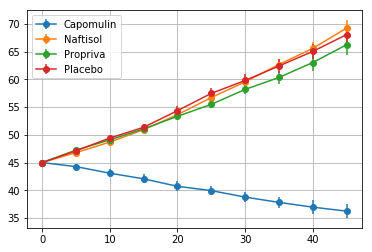

In [8]:
x = [0,5,10,15,20,25,30,35,40,45]

y1 = pivot_avg_sm[drug1]
err1 = pivot_sem_sm[drug1]
plt.errorbar(x,y1, err1, marker ='o')

y2 = pivot_avg_sm[drug2]
err2 = pivot_sem_sm[drug2]
plt.errorbar(x,y2, err2, marker ='o')

y3 = pivot_avg_sm[drug3]
err3 = pivot_sem_sm[drug3]
plt.errorbar(x,y3, err3, marker ='o')

y4 = pivot_avg_sm["Placebo"]
err4 = pivot_sem_sm["Placebo"]
plt.errorbar(x,y4, err4, marker ='o')


plt.legend(loc="best")


plt.grid()

plt.title("Tumor Response to Treatment")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")




In [9]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [13]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [15]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [16]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
# plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [18]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
# fig.show()